In [ ]:
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow


In [ ]:
# sketch generating function
def sketch(image):
  # converting image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # cleaning image using gaussian blur
  gray_blur = cv2.GaussianBlur(gray,(5,5),0)

  # Extracting edges
  canny_edges = cv2.Canny(gray_blur,10,70)

  # Doing invert binarize the image
  ret,mask = cv2.threshold(canny_edges,70,255,cv2.THRESH_BINARY_INV)
  return mask

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


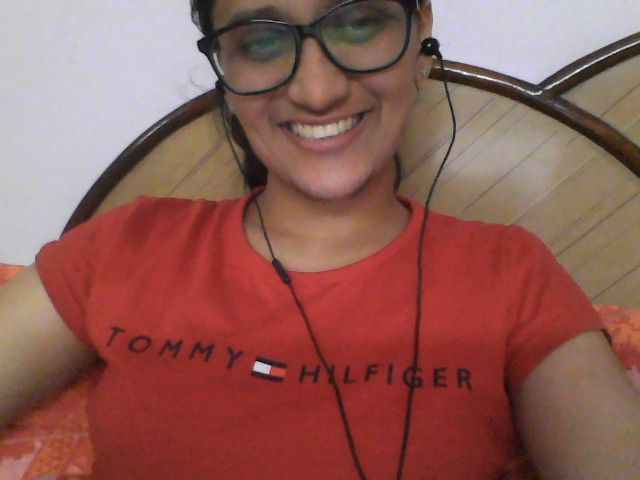

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

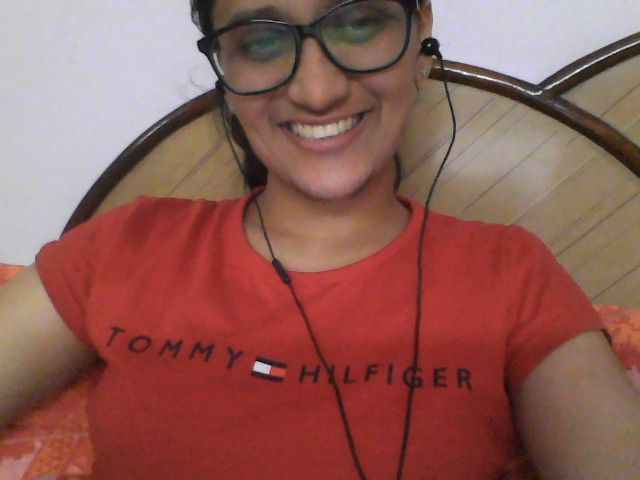

In [ ]:
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
# Initializing webcam, cap is the object provided by the VideoCapture
cap = cv2.VideoCapture(0)

while True:
  ret,frame = cap.read()
  cv2_imshow(sketch(photo.jpg))
  if cv2.waitKey(1) == 13:   # 13 is the enter key
    break;

#Release camera and close windows
cap.release()
cv2.destroyAllWindows()

NameError: ignored